In [1]:
!pip install tensorflow==2.15

In [2]:
import tensorflow as tf

In [3]:
tf.__version__

'2.15.0'

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle

In [5]:
!kaggle datasets download -d gpiosenka/sports-classification


Dataset URL: https://www.kaggle.com/datasets/gpiosenka/sports-classification
License(s): CC0-1.0
100% 422M/424M [00:05<00:00, 133MB/s]
100% 424M/424M [00:05<00:00, 84.2MB/s]


In [6]:



!unzip '/content/sports-classification.zip'

Streaming output truncated to the last 5000 lines.
  inflating: train/rings/022.jpg     
  inflating: train/rings/023.jpg     
  inflating: train/rings/024.jpg     
  inflating: train/rings/025.jpg     
  inflating: train/rings/026.jpg     
  inflating: train/rings/027.jpg     
  inflating: train/rings/028.jpg     
  inflating: train/rings/029.jpg     
  inflating: train/rings/030.jpg     
  inflating: train/rings/031.jpg     
  inflating: train/rings/032.jpg     
  inflating: train/rings/033.jpg     
  inflating: train/rings/034.jpg     
  inflating: train/rings/035.jpg     
  inflating: train/rings/036.jpg     
  inflating: train/rings/037.jpg     
  inflating: train/rings/038.jpg     
  inflating: train/rings/039.jpg     
  inflating: train/rings/040.jpg     
  inflating: train/rings/041.jpg     
  inflating: train/rings/042.jpg     
  inflating: train/rings/043.jpg     
  inflating: train/rings/044.jpg     
  inflating: train/rings/045.jpg     
  inflating: train/rings/046.jpg     

In [7]:
trainPath = '/content/train'
testPath = '/content/test'
validPath = '/content/valid'

In [8]:
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from glob import glob
import numpy as np
import matplotlib.pyplot as plt


In [9]:
#import image datagenerator library
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [10]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=[0.99, 1.01],
    brightness_range=[0.8, 1.2],
    horizontal_flip=True,
    data_format="channels_last",
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

In [11]:
training_set = train_datagen.flow_from_directory(
    '/content/train',
    target_size=(224, 224),
    batch_size=64,
    class_mode='categorical'
)

test_set = test_datagen.flow_from_directory(
    '/content/test',
    target_size=(224, 224),
    batch_size=64,
    class_mode='categorical'
)

Found 13492 images belonging to 100 classes.
Found 500 images belonging to 100 classes.


# VGG16

In [12]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.models import Model

In [13]:
vgg = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

58889256/58889256 [==============================] - 0s 0us/step


In [14]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [15]:
for layer in vgg.layers:
  print(layer)

In [16]:
for layer in vgg.layers:
    layer.trainable = False

In [17]:
x = Flatten()(vgg.output)
output = Dense(100,activation='softmax')(x)
vgg16 = Model(vgg.input,output)

In [18]:
vgg16.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [19]:
vgg16.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'],run_eagerly=True)

In [20]:
import sys
r = vgg16.fit_generator(
    training_set,
    validation_data=test_set,
    epochs=20,
    steps_per_epoch=len(training_set)//3,
    validation_steps=len(test_set)//3
)

<ipython-input-20-66704c7fd1aa>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = vgg16.fit_generator(


Epoch 1/20
70/70 [==============================] - 135s 1s/step - loss: 3.3539 - accuracy: 0.3250 - val_loss: 1.2559 - val_accuracy: 0.6484
Epoch 2/20
70/70 [==============================] - 95s 1s/step - loss: 1.5005 - accuracy: 0.6279 - val_loss: 1.1559 - val_accuracy: 0.6953
Epoch 3/20
70/70 [==============================] - 95s 1s/step - loss: 1.1133 - accuracy: 0.7152 - val_loss: 0.6544 - val_accuracy: 0.8281
Epoch 4/20
70/70 [==============================] - 128s 2s/step - loss: 0.8555 - accuracy: 0.7829 - val_loss: 0.7171 - val_accuracy: 0.7969
Epoch 5/20
70/70 [==============================] - 95s 1s/step - loss: 0.6860 - accuracy: 0.8203 - val_loss: 0.6902 - val_accuracy: 0.8047
Epoch 6/20
70/70 [==============================] - 95s 1s/step - loss: 0.6202 - accuracy: 0.8446 - val_loss: 0.6656 - val_accuracy: 0.7812
Epoch 7/20
70/70 [==============================] - 97s 1s/step - loss: 0.5421 - accuracy: 0.8569 - val_loss: 0.8528 - val_accuracy: 0.7734
Epoch 8/20
70/70 [

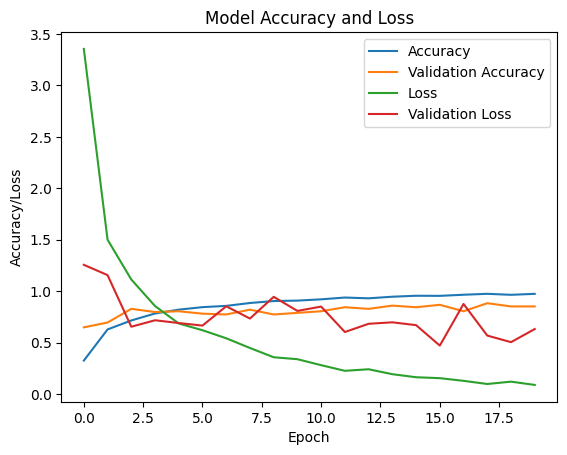

In [22]:
import matplotlib.pyplot as plt

# Plotting accuracy
plt.plot(r.history["accuracy"])
plt.plot(r.history['val_accuracy'])

# Plotting loss
plt.plot(r.history['loss'])
plt.plot(r.history['val_loss'])

# Adding title and labels
plt.title("Model Accuracy and Loss")
plt.ylabel("Accuracy/Loss")
plt.xlabel("Epoch")

# Adding legend
plt.legend(["Accuracy", "Validation Accuracy", "Loss", "Validation Loss"])

# Displaying plot
plt.show()

In [23]:
vgg16.save("project1.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [24]:
import os

def list_labels(directory):
    try:
        # List all subdirectories in the given directory
        labels = [name for name in os.listdir(directory) if os.path.isdir(os.path.join(directory, name))]
        return labels
    except Exception as e:
        return str(e)

# Directory path
test_directory = "/content/test"

# Get the list of labels
labels = list_labels(test_directory)
labels.sort()

# Print the labels
for label in labels:
    print(label)


air hockey
ampute football
archery
arm wrestling
axe throwing
balance beam
barell racing
baseball
basketball
baton twirling
bike polo
billiards
bmx
bobsled
bowling
boxing
bull riding
bungee jumping
canoe slamon
cheerleading
chuckwagon racing
cricket
croquet
curling
disc golf
fencing
field hockey
figure skating men
figure skating pairs
figure skating women
fly fishing
football
formula 1 racing
frisbee
gaga
giant slalom
golf
hammer throw
hang gliding
harness racing
high jump
hockey
horse jumping
horse racing
horseshoe pitching
hurdles
hydroplane racing
ice climbing
ice yachting
jai alai
javelin
jousting
judo
lacrosse
log rolling
luge
motorcycle racing
mushing
nascar racing
olympic wrestling
parallel bar
pole climbing
pole dancing
pole vault
polo
pommel horse
rings
rock climbing
roller derby
rollerblade racing
rowing
rugby
sailboat racing
shot put
shuffleboard
sidecar racing
ski jumping
sky surfing
skydiving
snow boarding
snowmobile racing
speed skating
steer wrestling
sumo wrestling
surf

In [25]:
#import load_model class for loading h5 file
from tensorflow.keras.models import load_model
#import image class to process the images
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import preprocess_input
import numpy as np

In [26]:
#load saved vgg 16 model file
model=load_model("project1.h5")


In [27]:
# test accuracy
print('Test Score',model.evaluate(test_set))

8/8 [==============================] - 26s 2s/step - loss: 0.6175 - accuracy: 0.8500
Test Score [0.6175491809844971, 0.8500000238418579]


In [28]:
# train accuracy
print('Train Score',model.evaluate(training_set))

211/211 [==============================] - 199s 941ms/step - loss: 0.0676 - accuracy: 0.9819
Train Score [0.06758040934801102, 0.9819152355194092]


In [29]:
#Create a class of images
class_names = test_set.class_indices
print(class_names)

{'air hockey': 0, 'ampute football': 1, 'archery': 2, 'arm wrestling': 3, 'axe throwing': 4, 'balance beam': 5, 'barell racing': 6, 'baseball': 7, 'basketball': 8, 'baton twirling': 9, 'bike polo': 10, 'billiards': 11, 'bmx': 12, 'bobsled': 13, 'bowling': 14, 'boxing': 15, 'bull riding': 16, 'bungee jumping': 17, 'canoe slamon': 18, 'cheerleading': 19, 'chuckwagon racing': 20, 'cricket': 21, 'croquet': 22, 'curling': 23, 'disc golf': 24, 'fencing': 25, 'field hockey': 26, 'figure skating men': 27, 'figure skating pairs': 28, 'figure skating women': 29, 'fly fishing': 30, 'football': 31, 'formula 1 racing': 32, 'frisbee': 33, 'gaga': 34, 'giant slalom': 35, 'golf': 36, 'hammer throw': 37, 'hang gliding': 38, 'harness racing': 39, 'high jump': 40, 'hockey': 41, 'horse jumping': 42, 'horse racing': 43, 'horseshoe pitching': 44, 'hurdles': 45, 'hydroplane racing': 46, 'ice climbing': 47, 'ice yachting': 48, 'jai alai': 49, 'javelin': 50, 'jousting': 51, 'judo': 52, 'lacrosse': 53, 'log rol

In [39]:
img=image.load_img("/content/test/sky surfing/4.jpg", target_size=(224,224))
#convert image to array format
x=image.img_to_array(img)
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
output=np.argmax(model.predict(img_data), axis=1)
index=['air hockey', 'ampute football', 'archery', 'arm wrestling', 'axe throwing',
    'balance beam', 'barell racing', 'baseball', 'basketball', 'baton twirling',
    'bike polo', 'billiards', 'bmx', 'bobsled', 'bowling', 'boxing', 'bull riding',
    'bungee jumping', 'canoe slamon', 'cheerleading', 'chuckwagon racing', 'cricket',
    'croquet', 'curling', 'disc golf', 'fencing', 'field hockey', 'figure skating men',
    'figure skating pairs', 'figure skating women', 'fly fishing', 'football',
    'formula 1 racing', 'frisbee', 'gaga', 'giant slalom', 'golf', 'hammer throw',
    'hang gliding', 'harness racing', 'high jump', 'hockey', 'horse jumping',
    'horse racing', 'horseshoe pitching', 'hurdles', 'hydroplane racing', 'ice climbing',
    'ice yachting', 'jai alai', 'javelin', 'jousting', 'judo', 'lacrosse', 'log rolling',
    'luge', 'motorcycle racing', 'mushing', 'nascar racing', 'olympic wrestling',
    'parallel bar', 'pole climbing', 'pole dancing', 'pole vault', 'polo', 'pommel horse',
    'rings', 'rock climbing', 'roller derby', 'rollerblade racing', 'rowing', 'rugby',
    'sailboat racing', 'shot put', 'shuffleboard', 'sidecar racing', 'ski jumping',
    'sky surfing', 'skydiving', 'snow boarding', 'snowmobile racing', 'speed skating',
    'steer wrestling', 'sumo wrestling', 'surfing', 'swimming', 'table tennis', 'tennis',
    'track bicycle', 'trapeze', 'tug of war', 'ultimate', 'uneven bars', 'volleyball',
    'water cycling', 'water polo', 'weightlifting', 'wheelchair basketball',
    'wheelchair racing', 'wingsuit flying']
result = str(index[output[0]])
result


1/1 [==============================] - 0s 19ms/step


'sky surfing'

In [41]:

loss, accuracy = model.evaluate(
    test_set,
    steps=len(test_set),
    verbose=2,
    use_multiprocessing=True,
    workers=2
)

print(f'Model performance on test images: \nAccuracy = {accuracy}\nLoss = {loss}')


8/8 - 3s - loss: 0.6175 - accuracy: 0.8500 - 3s/epoch - 405ms/step
Model performance on test images: 
Accuracy = 0.8500000238418579
Loss = 0.6175491213798523
